# **TRABAJO PRÁCTICO FINAL**     

| Integrantes | Legajo o DNI|
| ----- | --- |
|Geuna, Facundo | G-5445/3 |
|Virga, Marlen | 38598673 |


## Nombre del artista elegido
Bad Bunny

# Archivos

## Descarga

In [ ]:
import requests
spotify_previews_file = "https://raw.githubusercontent.com/elgatoylacaja/spotify-analysis/main/input/spotify-previews.csv"
nodes_file = "https://raw.githubusercontent.com/elgatoylacaja/spotify-analysis/main/input/nodes.csv"

In [ ]:
def descargar_csv(url, archivo_salida):
    print("Descargando archivo...")
    consulta = requests.get(url)
    contenido = consulta.content

    print("Guardando archivo...")
    # Abrir conexion en modo escritura
    with open(archivo_salida, "w", encoding="utf-8") as archivo:
        # Escribir el contenido de la consulta
        archivo.write(contenido.decode("utf-8"))

    print("¡Archivo descargado con éxito!")

In [ ]:
descargar_csv(spotify_previews_file, "spotify_previews.csv")
descargar_csv(nodes_file, "nodes.csv")

Descargando archivo...
Guardando archivo...
¡Archivo descargado con éxito!
Descargando archivo...
Guardando archivo...
¡Archivo descargado con éxito!


## Lectura

In [ ]:
import csv

In [ ]:
def open_file(file_path):
  """
  Ingresa direccion del archivo
  Lee datos del archivo de entrada y retorna
  una lista con la información que se va a usar en el trabajo.
  """
  coleccion_de_datos = []
  with open(file_path, mode='r') as archivo:
    lector = csv.DictReader(archivo)
    for fila in lector:
      coleccion_de_datos.append(dict(fila))
  return coleccion_de_datos

In [ ]:
datos_de_spotify_file = open_file("spotify_previews.csv")
datos_de_nodes = open_file('nodes.csv')
datos_de_nodes

# Filtrado de datos

1. Crear una función que sólo devuelva (con la misma estructura de datos que se está trabajando) los datos de determinados encabezados pasados como parámetros.

In [ ]:
#lista de diccionarios
def primer_filtrado(datos, **kwargs):
  """
  toma un arreglo de diccionarios y devuelve un arreglo con los diccionarios
  que cumplan con las condiciones establecidas en Kwargs
  """
  datos_filtrados = []
  for dato in datos:
    for clave,valor in kwargs.items():
      if dato[clave] == valor:
        datos_filtrados.append(dato)
  return datos_filtrados

def segundo_filtrado(datos, *args):
  """
  Toma un arreglo de diccionarios y devuelve un arreglo de diccionarios
  que solo contienen la informacion requerida en Args
  """
  datos_de_salida = []
  for dato in datos:
    diccionario = {}
    for arg in args:
      diccionario[arg] = dato[arg]
    datos_de_salida.append(diccionario)
  return datos_de_salida

def filtrado(datos, *args, **kwargs):
  return segundo_filtrado(primer_filtrado(datos, **kwargs), *args)

In [ ]:
filtrado(datos_de_nodes, 'label', 'followers', popularity = '90', total_collabs='4')

2. Crear una función, que dado un artista, devuelva una lista de todos los artistas con los que colaboró.

In [ ]:
def colaboracion_artistas(canciones, artistas, artista_elegido):
  """
  Crea una lista ordenada con los artistas que colaboró
  el artista elegido y sus respectivos followers
  """
  artista_elegido = artista_elegido.title()
  colaboraciones = []
  for cancion in canciones:
    for artista in artistas:
      if cancion["source"] == artista_elegido and cancion["target"] == artista["label"] : #si el artista de una fila es igual al artista elegido y a la vez el que colabora en una cancion con ese, debe ser igual al del archivo nodes para poder poner sus followers en una lista
        nombres_y_followers = (int(artista["followers"]), cancion["target"])
        colaboraciones.append(nombres_y_followers) # crea una lista de tuplas
  colaboraciones.sort(reverse = True) # ordena la lista de mayor a menor por la cantidad de followers
  return colaboraciones

In [ ]:
colaboraciones_con_followers = colaboracion_artistas(datos_de_spotify_file, datos_de_nodes, "bad bunny" )

In [ ]:
colaboraciones_con_followers

In [ ]:
colaboraciones_con_followers = colaboraciones_con_followers[:10] #la recorto en 10 para poder graficar luego

In [ ]:
colaboraciones_con_followers

# Clases

## Clase Artista

1. Crear el constructor de la clase Artista. Sus atributos serán:
- nombre
- seguidores
- popularidad
- colaboraciones
- centralidad
2. Crear un metodo \_\_str_\_ que devuelva los datos del artista bien formateados.



In [ ]:
class Artista:
    """
    Esta clase representa un artista,
    contiene su nombre y los datos relevantes al análisis.
    """
    def __init__(self, nombre, seguidores, popularidad, colaboraciones, centralidad):

#Atributos de instancia
      self.nombre = nombre
      self.seguidores = seguidores
      self.popularidad = popularidad
      self.colaboraciones = colaboraciones
      self.centralidad = centralidad

    def __str__(self):
      return f"Nombre: {self.nombre} \nSeguidores: {self.seguidores} \nPopularidad: {self.popularidad} \nColaboraciones: {self.colaboraciones} \nCentralidad: {self.centralidad}"


artista_1= Artista("Bad Bunny", 52915846, 100, 245, 16172.97705)
print(artista_1)

Nombre: Bad Bunny 
Seguidores: 52915846 
Popularidad: 100 
Colaboraciones: 245 
Centralidad: 16172.97705


## Clase Canción

1. Crear el constructor de la clase Canción. Sus atributos serán:
- id
- spotify_track_name
- spotify_artists
- preview

2. Crear un metodo \_\_str_\_ que devuelva los datos de la canción bien formateados.

3. Crear un método que determine si un artista participa o no en esta cancion.

In [ ]:
class Cancion:
  """
  Esta clase representa un canción,
  contiene su nombre y los datos relevantes al análisis.
  """
  def __init__(self, id, nombre, artistas, trozo_de_cancion):
    artistas = artistas.split(", ")
    self.id = id
    self.nombre = nombre
    self.artistas = artistas
    self.trozo_de_cancion = trozo_de_cancion

  def __str__(self):
    return f"Los datos de la cancion {self.nombre} son: \nID: {self.id} \nArtista/s: {', '.join(self.artistas)} \nPreview: {self.trozo_de_cancion}"

  def participa(self, artista):
    """
    Este método recibe un artista elegido
    e indica si el mismo participa en la cancion
    elegida
    """
    if artista in self.artistas:
      print("El artista", artista, "si participa de la canción")
    else:
      print("El artista", artista, "no participa de la canción")

In [ ]:
primer_cancion = Cancion("41oY4WCTj5kccfesTVFnvN", "Tarot", "Bad Bunny, Jhay Cortez", "https://p.scdn.co/mp3-preview/db8db5f15768f239548f3499bdd12bfcc6ce063f?cid=774b29d4f13844c495f206cafdad9c86")
primer_cancion.participa("Jhay Cortez")
primer_cancion.participa("Bad Bunny")
print(primer_cancion)

In [ ]:
primer_cancion.participa("Anuel")

El artista Anuel no participa de la canción


## Clase Banda

Crear una clase Banda (hija de la clase Artista) con los atributos que crea convenientes para modelar una banda musical y defina un método apropiado en función de los atributos elegidos.

In [ ]:
class Banda(Artista):
  """
  Esta clase representa una banda, contiene su nombre
  y los datos relevantes para su análisis.
  """
#Atributos de instancia
  def __init__(self, nombre, seguidores, popularidad, colaboraciones, centralidad, genero, integrantes, creacion):
      self.nombre = nombre
      self.seguidores = seguidores
      self.popularidad = popularidad
      self.colaboraciones = colaboraciones
      self.centralidad = centralidad
      self.genero = genero
      self.integrantes = integrantes
      self.creacion = creacion
  # def __str__(self):
  #     return f"Nombre: {self.nombre} \nSeguidores: {self.seguidores} \nPopularidad: {self.popularidad} \nColaboraciones: {self.colaboraciones} \nCentralidad: {self.centralidad}"

  def descripcion(self):
      print(self.nombre,"es una banda de", self.genero,", tiene", str(self.integrantes),"integrantes y fue creada en el año", str(self.creacion))

#metodo popularidad

  def popularity(self):
      if self.popularidad >= 80:
        return f'La popularidad de la banda {self.nombre} es alta'
      elif self.popularidad >= 60:
        return f'La popularidad de la banda {self.nombre} es media/alta'
      elif self.popularidad >= 40:
        return f'La popularidad de la banda {self.nombre} es media/baja'
      elif self.popularidad >= 20:
        return f'La popularidad de la banda {self.nombre} es baja'
      elif self.popularidad >= 0:
        return f'La popularidad de la banda {self.nombre} es muy baja'

In [ ]:
banda_1 = Banda('Mana', 8281658, 76, 5, 273.630295, 'rock', 4, 1986)
print(banda_1)
print(banda_1.popularity())
banda_1.descripcion()

# Gráficos

1. Mostrar en un gráfico de barras, la cantidad de seguidores que tiene cada artista con el que colaboró el artista elegido para analizar.

In [ ]:
#Funcion para la creación de listas para el gráfico
def listas_grafico(colaboraciones_con_followers):
  """
  Recibe una lista de los artistas con
  sus respectivos followers y devuelve dos listas
  con los datos por separado y las retorna.
  """
#Lista eje y
  followers = []
  for artistas in colaboraciones_con_followers:
    followers.append(artistas[0])

#Lista eje x
  nombres_artistas = []
  for artistas in colaboraciones_con_followers:
    nombres_artistas.append(artistas[1])

  return (followers, nombres_artistas)

In [ ]:
followers, nombres_artistas = listas_grafico(colaboraciones_con_followers)

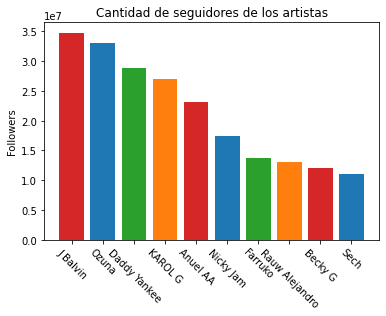

In [ ]:
#Creacion de grafico
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

bar_labels = ['red', 'blue', 'green', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

ax.bar(nombres_artistas,followers , color=bar_colors)
ax.set_ylabel('Followers')
ax.set_title('Cantidad de seguidores de los artistas')

ax.set_xticklabels(nombres_artistas, rotation = -45)

plt.show()
